In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
data = pd.read_csv(r"C:\Users\Hp\Desktop\ICT\data set\Wine_clust.csv")

In [99]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [100]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [101]:
data.shape

(178, 13)

In [102]:
data.info()from sklearn.cluster import KMeans

SyntaxError: invalid syntax (2449073718.py, line 1)

### KmeansClustering

In [103]:
from sklearn.cluster import KMeans

In [104]:
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters = i ,init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'wcss')

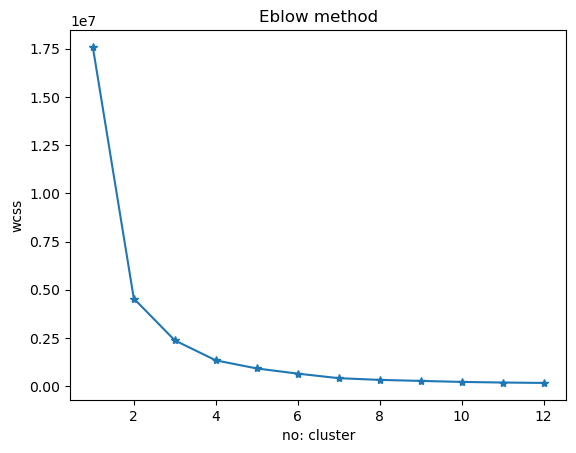

In [105]:
plt.plot(range(1,13),wcss,'-*')
plt.title('Eblow method')
plt.xlabel('no: cluster')
plt.ylabel('wcss')

In [106]:
kmeans = KMeans(n_clusters = 2 ,init = 'k-means++', random_state = 42)
y_kmeans=kmeans.fit_predict(data)
  

In [107]:
print(y_kmeans)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [108]:
from sklearn.metrics import silhouette_score

In [109]:
silhouette_sc=silhouette_score(data,y_kmeans)
print(silhouette_sc)

0.6568536504294317


### PCA

In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data,columns=data.columns)

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
sc= StandardScaler
from sklearn.decomposition import PCA

In [113]:
pca=PCA(n_components=12)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [114]:
x_pca.shape

(178, 12)

In [115]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233])

In [116]:
np.sum(pca.explained_variance_ratio_)

0.9920478511010056

### Agglomerative_HC

In [117]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidian distance')

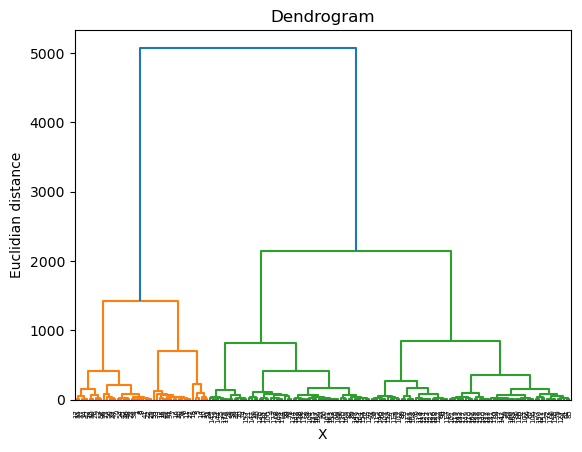

In [118]:
dendrogram = sch.dendrogram(sch.linkage(data,method ='ward'))
plt.title("Dendrogram")
plt.xlabel('X')
plt.ylabel('Euclidian distance')

In [119]:
 from sklearn.cluster import AgglomerativeClustering

In [120]:
hc=AgglomerativeClustering( n_clusters=4,affinity='euclidean',linkage='ward')

In [121]:
y_hc=hc.fit_predict(data)

In [122]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(data,y_hc)
print(silhouette_avg)

0.5606726948394264
